# BMI Prediction Model

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [12]:
bio_data = pd.read_csv(r'C:\Users\ryanj\Desktop\CSA2025\data\anthropometric_trait_gwas.csv')

In [13]:
bio_data

age     sex   cohort  systolic_BP  diastolic_BP  LDL_cholesterol  \
0     56    Male  Ugandan   118.002747     84.264252       162.624051   
1     69    Male     Zulu   136.989197     76.344685       114.354831   
2     46    Male     Zulu   125.901988     81.773698       155.910738   
3     32  Female  Ugandan   127.833587     75.676216       122.402092   
4     60    Male     Zulu   115.295104     92.281726        93.632389   
..   ...     ...      ...          ...           ...              ...   
995   60  Female  Ugandan   129.687699     75.627514       113.306936   
996   64    Male     Zulu   139.671781     86.463956       101.231992   
997   62  Female     Zulu   124.939774     68.325829       139.817775   
998   35    Male  Ugandan   126.376524     71.258623       103.083569   
999   55    Male  Ugandan   137.418223     86.889139       166.445025   

     HDL_cholesterol  height  weight        BMI  ...  SNP_991  SNP_992  \
0          40.742849    1.82    79.9  24.121483  ...        2        1   
1          51.891454    1.84    90.5  26.730860  ...        1        2   
2          46.008973    1.89    73.7  20.632121  ...        1        1   
3          48.024370    1.60    48.7  19.023438  ...        1        1   
4          74.678976    1.92   100.2  27.180990  ...        2        1   
..               ...     ...     ...        ...  ...      ...      ...   
995        29.592177    1.61    59.3  22.877204  ...        2        1   
996        69.297920    1.83    93.5  27.919615  ...        1        0   
997        51.528076    1.60    74.7  29.179688  ...        0        1   
998        56.964574    1.86    86.8  25.089606  ...        2        1   
999        55.227480    1.84    76.9  22.713847  ...        1        2   

     SNP_993  SNP_994  SNP_995  SNP_996  SNP_997  SNP_998  SNP_999  SNP_1000  
0          1        1        2        2        0        2        1         1  
1          2        0        0        0        1        0        2         0  
2          1        1        1        2        1        1        0         1  
3          2        1        1        0        1        0        0         2  
4          1        1        1        2        1        1        1         0  
..       ...      ...      ...      ...      ...      ...      ...       ...  
995        1        2        1        1        1        0        0         1  
996        2        1        2        2        0        2        0         0  
997        0        1        1        0        0        2        0         0  
998        2        2        2        2        0        2        2         0  
999        0        0        2        1        2        2        1         1  

[1000 rows x 1013 columns]

In [14]:
bio_data.columns

Index(['age', 'sex', 'cohort', 'systolic_BP', 'diastolic_BP',
       'LDL_cholesterol', 'HDL_cholesterol', 'height', 'weight', 'BMI',
       ...
       'SNP_991', 'SNP_992', 'SNP_993', 'SNP_994', 'SNP_995', 'SNP_996',
       'SNP_997', 'SNP_998', 'SNP_999', 'SNP_1000'],
      dtype='object', length=1013)

In [15]:
bio_data['BMI'].max()

43.98038752

In [16]:
import joblib
features_to_scale = ['LDL_cholesterol', 'HDL_cholesterol', 'systolic_BP', 'diastolic_BP', 'BMI', 'age', 'weight', 'height', 'waist_circumference', 'hip_circumference']
scaler = StandardScaler()
bio_data[features_to_scale] = scaler.fit_transform(bio_data[features_to_scale])


joblib.dump(scaler, "full_scaler.pkl")

['full_scaler.pkl']

In [17]:

df = bio_data['sex']
df


0        Male
1        Male
2        Male
3      Female
4        Male
        ...  
995    Female
996      Male
997    Female
998      Male
999      Male
Name: sex, Length: 1000, dtype: object

In [20]:
encoder = OneHotEncoder()
one_hot_encoded = encoder.fit_transform(df.to_frame())
one_hot_df = pd.DataFrame(one_hot_encoded.toarray(), columns=encoder.get_feature_names_out([df.name]))
bio_data = pd.concat([bio_data, one_hot_df], axis=1)

bio_data

age     sex   cohort  systolic_BP  diastolic_BP  LDL_cholesterol  \
0    0.812959    Male  Ugandan    -0.606279      0.444187         1.172468   
1    1.680578    Male     Zulu     1.095283     -0.377477        -0.548804   
2    0.145560    Male     Zulu     0.101649      0.185789         0.933073   
3   -0.788799  Female  Ugandan     0.274759     -0.446832        -0.261840   
4    1.079919    Male     Zulu    -0.848938      1.276010        -1.287763   
..        ...     ...      ...          ...           ...              ...   
995  1.079919  Female  Ugandan     0.440924     -0.451885        -0.586172   
996  1.346879    Male     Zulu     1.335696      0.672409        -1.016762   
997  1.213399  Female     Zulu     0.015416     -1.209443         0.359200   
998 -0.588580    Male  Ugandan     0.144177     -0.905162        -0.950735   
999  0.746219    Male  Ugandan     1.133733      0.716522         1.308724   

     HDL_cholesterol    height    weight       BMI  ...  SNP_995  SNP_996  \
0          -1.039078  0.679301  0.090362 -0.336726  ...        2        2   
1           0.161857  0.833478  0.636477  0.162759  ...        0        0   
2          -0.471807  1.218919 -0.229065 -1.004657  ...        1        2   
3          -0.254707 -1.016640 -1.517073 -1.312590  ...        1        0   
4           2.616544  1.450184  1.136224  0.248922  ...        1        2   
..               ...       ...       ...       ...  ...      ...      ...   
995        -2.240235 -0.939551 -0.970957 -0.574905  ...        1        1   
996         2.036893  0.756390  0.791038  0.390309  ...        2        2   
997         0.122714 -1.016640 -0.177544  0.631511  ...        1        0   
998         0.708337  0.987654  0.445852 -0.151409  ...        2        2   
999         0.521216  0.833478 -0.064199 -0.606174  ...        2        1   

     SNP_997  SNP_998  SNP_999  SNP_1000  sex_Female  sex_Male  sex_Female  \
0          0        2        1         1         0.0       1.0         0.0   
1          1        0        2         0         0.0       1.0         0.0   
2          1        1        0         1         0.0       1.0         0.0   
3          1        0        0         2         1.0       0.0         1.0   
4          1        1        1         0         0.0       1.0         0.0   
..       ...      ...      ...       ...         ...       ...         ...   
995        1        0        0         1         1.0       0.0         1.0   
996        0        2        0         0         0.0       1.0         0.0   
997        0        2        0         0         1.0       0.0         1.0   
998        0        2        2         0         0.0       1.0         0.0   
999        2        2        1         1         0.0       1.0         0.0   

     sex_Male  
0         1.0  
1         1.0  
2         1.0  
3         0.0  
4         1.0  
..        ...  
995       0.0  
996       1.0  
997       0.0  
998       1.0  
999       1.0  

[1000 rows x 1017 columns]

In [21]:
bio_data2 = bio_data.drop(columns=['sex', 'cohort'])
bio_data2

age  systolic_BP  diastolic_BP  LDL_cholesterol  HDL_cholesterol  \
0    0.812959    -0.606279      0.444187         1.172468        -1.039078   
1    1.680578     1.095283     -0.377477        -0.548804         0.161857   
2    0.145560     0.101649      0.185789         0.933073        -0.471807   
3   -0.788799     0.274759     -0.446832        -0.261840        -0.254707   
4    1.079919    -0.848938      1.276010        -1.287763         2.616544   
..        ...          ...           ...              ...              ...   
995  1.079919     0.440924     -0.451885        -0.586172        -2.240235   
996  1.346879     1.335696      0.672409        -1.016762         2.036893   
997  1.213399     0.015416     -1.209443         0.359200         0.122714   
998 -0.588580     0.144177     -0.905162        -0.950735         0.708337   
999  0.746219     1.133733      0.716522         1.308724         0.521216   

       height    weight       BMI  waist_circumference  hip_circumference  \
0    0.679301  0.090362 -0.336726            -0.507418          -1.610935   
1    0.833478  0.636477  0.162759             1.193366           0.222913   
2    1.218919 -0.229065 -1.004657             0.466989          -0.302641   
3   -1.016640 -1.517073 -1.312590            -0.294820          -0.906469   
4    1.450184  1.136224  0.248922             1.397105           0.491281   
..        ...       ...       ...                  ...                ...   
995 -0.939551 -0.970957 -0.574905            -1.783006          -1.152473   
996  0.756390  0.791038  0.390309             0.378407           0.077547   
997 -1.016640 -0.177544  0.631511             1.281948           1.229293   
998  0.987654  0.445852 -0.151409            -0.959189          -0.123729   
999  0.833478 -0.064199 -0.606174            -1.127496           0.591919   

     ...  SNP_995  SNP_996  SNP_997  SNP_998  SNP_999  SNP_1000  sex_Female  \
0    ...        2        2        0        2        1         1         0.0   
1    ...        0        0        1        0        2         0         0.0   
2    ...        1        2        1        1        0         1         0.0   
3    ...        1        0        1        0        0         2         1.0   
4    ...        1        2        1        1        1         0         0.0   
..   ...      ...      ...      ...      ...      ...       ...         ...   
995  ...        1        1        1        0        0         1         1.0   
996  ...        2        2        0        2        0         0         0.0   
997  ...        1        0        0        2        0         0         1.0   
998  ...        2        2        0        2        2         0         0.0   
999  ...        2        1        2        2        1         1         0.0   

     sex_Male  sex_Female  sex_Male  
0         1.0         0.0       1.0  
1         1.0         0.0       1.0  
2         1.0         0.0       1.0  
3         0.0         1.0       0.0  
4         1.0         0.0       1.0  
..        ...         ...       ...  
995       0.0         1.0       0.0  
996       1.0         0.0       1.0  
997       0.0         1.0       0.0  
998       1.0         0.0       1.0  
999       1.0         0.0       1.0  

[1000 rows x 1015 columns]

# set the Target, Y and Data, X

In [22]:
Y = bio_data2['BMI']
X = bio_data2.drop(columns=['BMI'], axis=1)

In [23]:
Y

0     -0.336726
1      0.162759
2     -1.004657
3     -1.312590
4      0.248922
         ...   
995   -0.574905
996    0.390309
997    0.631511
998   -0.151409
999   -0.606174
Name: BMI, Length: 1000, dtype: float64

In [24]:
X

age  systolic_BP  diastolic_BP  LDL_cholesterol  HDL_cholesterol  \
0    0.812959    -0.606279      0.444187         1.172468        -1.039078   
1    1.680578     1.095283     -0.377477        -0.548804         0.161857   
2    0.145560     0.101649      0.185789         0.933073        -0.471807   
3   -0.788799     0.274759     -0.446832        -0.261840        -0.254707   
4    1.079919    -0.848938      1.276010        -1.287763         2.616544   
..        ...          ...           ...              ...              ...   
995  1.079919     0.440924     -0.451885        -0.586172        -2.240235   
996  1.346879     1.335696      0.672409        -1.016762         2.036893   
997  1.213399     0.015416     -1.209443         0.359200         0.122714   
998 -0.588580     0.144177     -0.905162        -0.950735         0.708337   
999  0.746219     1.133733      0.716522         1.308724         0.521216   

       height    weight  waist_circumference  hip_circumference       WHR  \
0    0.679301  0.090362            -0.507418          -1.610935  1.013605   
1    0.833478  0.636477             1.193366           0.222913  1.038241   
2    1.218919 -0.229065             0.466989          -0.302641  1.005005   
3   -1.016640 -1.517073            -0.294820          -0.906469  0.971429   
4    1.450184  1.136224             1.397105           0.491281  1.036449   
..        ...       ...                  ...                ...       ...   
995 -0.939551 -0.970957            -1.783006          -1.152473  0.812568   
996  0.756390  0.791038             0.378407           0.077547  0.962246   
997 -1.016640 -0.177544             1.281948           1.229293  0.964789   
998  0.987654  0.445852            -0.959189          -0.123729  0.830542   
999  0.833478 -0.064199            -1.127496           0.591919  0.763670   

     ...  SNP_995  SNP_996  SNP_997  SNP_998  SNP_999  SNP_1000  sex_Female  \
0    ...        2        2        0        2        1         1         0.0   
1    ...        0        0        1        0        2         0         0.0   
2    ...        1        2        1        1        0         1         0.0   
3    ...        1        0        1        0        0         2         1.0   
4    ...        1        2        1        1        1         0         0.0   
..   ...      ...      ...      ...      ...      ...       ...         ...   
995  ...        1        1        1        0        0         1         1.0   
996  ...        2        2        0        2        0         0         0.0   
997  ...        1        0        0        2        0         0         1.0   
998  ...        2        2        0        2        2         0         0.0   
999  ...        2        1        2        2        1         1         0.0   

     sex_Male  sex_Female  sex_Male  
0         1.0         0.0       1.0  
1         1.0         0.0       1.0  
2         1.0         0.0       1.0  
3         0.0         1.0       0.0  
4         1.0         0.0       1.0  
..        ...         ...       ...  
995       0.0         1.0       0.0  
996       1.0         0.0       1.0  
997       0.0         1.0       0.0  
998       1.0         0.0       1.0  
999       1.0         0.0       1.0  

[1000 rows x 1014 columns]

In [25]:
from sklearn.model_selection import train_test_split

## Perform 80/20 Data split

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [27]:
X_train.shape, Y_train.shape

((800, 1014), (800,))

In [28]:
X_test.shape, Y_test.shape

((200, 1014), (200,))

## Import model training modules

In [29]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [30]:
model = linear_model.LinearRegression()


Train the model

In [31]:
model.fit(X_train, Y_train)

LinearRegression()

Predict the target Y using X_test

In [32]:
Y_pred = model.predict(X_test)

## Prediction results

In [33]:
print("Coefficients: ", model.coef_)
print("Intercept: ", model.intercept_)
print("Mean squared error: %.2f" % mean_squared_error(Y_test, Y_pred))
print("Coefficient of determination: %.2f" % r2_score(Y_test, Y_pred))

Coefficients:  [-0.02131946 -0.00609023 -0.00213047 ... -0.07826262  0.07826262
 -0.07826262]
Intercept:  -0.5456841262884319
Mean squared error: 0.42
Coefficient of determination: 0.55


In [34]:
bio_data2

age  systolic_BP  diastolic_BP  LDL_cholesterol  HDL_cholesterol  \
0    0.812959    -0.606279      0.444187         1.172468        -1.039078   
1    1.680578     1.095283     -0.377477        -0.548804         0.161857   
2    0.145560     0.101649      0.185789         0.933073        -0.471807   
3   -0.788799     0.274759     -0.446832        -0.261840        -0.254707   
4    1.079919    -0.848938      1.276010        -1.287763         2.616544   
..        ...          ...           ...              ...              ...   
995  1.079919     0.440924     -0.451885        -0.586172        -2.240235   
996  1.346879     1.335696      0.672409        -1.016762         2.036893   
997  1.213399     0.015416     -1.209443         0.359200         0.122714   
998 -0.588580     0.144177     -0.905162        -0.950735         0.708337   
999  0.746219     1.133733      0.716522         1.308724         0.521216   

       height    weight       BMI  waist_circumference  hip_circumference  \
0    0.679301  0.090362 -0.336726            -0.507418          -1.610935   
1    0.833478  0.636477  0.162759             1.193366           0.222913   
2    1.218919 -0.229065 -1.004657             0.466989          -0.302641   
3   -1.016640 -1.517073 -1.312590            -0.294820          -0.906469   
4    1.450184  1.136224  0.248922             1.397105           0.491281   
..        ...       ...       ...                  ...                ...   
995 -0.939551 -0.970957 -0.574905            -1.783006          -1.152473   
996  0.756390  0.791038  0.390309             0.378407           0.077547   
997 -1.016640 -0.177544  0.631511             1.281948           1.229293   
998  0.987654  0.445852 -0.151409            -0.959189          -0.123729   
999  0.833478 -0.064199 -0.606174            -1.127496           0.591919   

     ...  SNP_995  SNP_996  SNP_997  SNP_998  SNP_999  SNP_1000  sex_Female  \
0    ...        2        2        0        2        1         1         0.0   
1    ...        0        0        1        0        2         0         0.0   
2    ...        1        2        1        1        0         1         0.0   
3    ...        1        0        1        0        0         2         1.0   
4    ...        1        2        1        1        1         0         0.0   
..   ...      ...      ...      ...      ...      ...       ...         ...   
995  ...        1        1        1        0        0         1         1.0   
996  ...        2        2        0        2        0         0         0.0   
997  ...        1        0        0        2        0         0         1.0   
998  ...        2        2        0        2        2         0         0.0   
999  ...        2        1        2        2        1         1         0.0   

     sex_Male  sex_Female  sex_Male  
0         1.0         0.0       1.0  
1         1.0         0.0       1.0  
2         1.0         0.0       1.0  
3         0.0         1.0       0.0  
4         1.0         0.0       1.0  
..        ...         ...       ...  
995       0.0         1.0       0.0  
996       1.0         0.0       1.0  
997       0.0         1.0       0.0  
998       1.0         0.0       1.0  
999       1.0         0.0       1.0  

[1000 rows x 1015 columns]

In [35]:
bio_data2.to_csv(r'C:\Users\ryanj\Desktop\CSA2025\data\bio_data2.csv', index=False)

In [36]:
r2_score(Y_test, Y_pred)

0.5467267853922326

Scatter Plots showing model accuracy

<Axes: xlabel='BMI'>

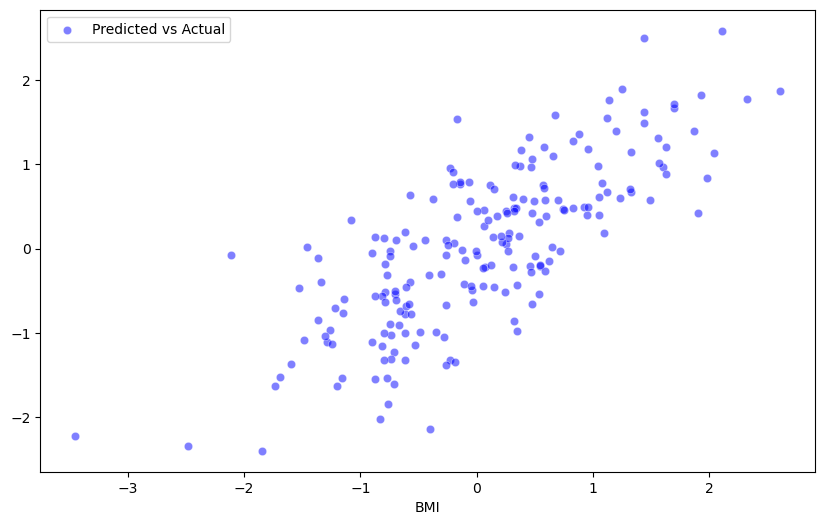

In [37]:
fig, ax = plt.subplots(figsize=(10, 6))

# Get the index of the test set to align with the original DataFrame
test_idx = X_test.index

# Use the original 'sex' column from bio_data for hue
sex_test = bio_data.loc[test_idx, 'sex']

sns.scatterplot(x=Y_test, y=Y_pred, color='blue', label='Predicted vs Actual', alpha=0.5, ax=ax)

In [38]:
Y_pred

array([-0.20332449,  0.10106459,  1.67155588,  0.95285957,  0.40207386,
       -0.70066434,  0.26958252, -1.31904547, -0.51787086,  1.09877354,
       -0.77688206, -0.31229115,  0.67467725, -0.96205394,  0.96278577,
        0.43955813,  0.64058303,  0.18393934,  0.33568361, -0.3958842 ,
        0.38847698,  2.58366891,  0.60932674, -0.89002095,  0.78530905,
        0.1919135 ,  0.97798947, -0.46990474, -0.66687042, -0.44318265,
        0.76117239, -1.52811131, -1.6089526 ,  0.90375278,  0.12477851,
        0.47858508, -0.76485229,  0.87882989,  0.42674924, -1.10438639,
       -0.0897577 ,  0.05648976, -0.55938194,  0.46357237, -0.41991937,
       -0.99744918, -0.43371498,  0.67424485, -0.03159555, -0.02438645,
        0.02683653,  0.14311383,  0.13176309,  0.01626701,  0.59542643,
        1.81578854, -0.56303573,  1.547791  , -0.97932505, -1.08192437,
        1.89140987, -0.53610863, -0.51744095,  0.74963712, -0.7421573 ,
       -0.6318179 ,  1.20072409, -0.21559212,  1.62236797, -0.60

In [39]:
import joblib

joblib.dump(X_train.columns.tolist(), "expected_features.pkl")

joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']